In [1]:
import pandas as pd

dataset = pd.read_csv("insurance_pre.csv")

In [2]:
dataset = pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [3]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [4]:
independent = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent = dataset[['charges']]

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [98]:
from sklearn.tree import DecisionTreeRegressor
#default criterion=squared_error,splitter=best,max_features=None

# regressor = DecisionTreeRegressor()
regressor = DecisionTreeRegressor(criterion='poisson',splitter='random')
# regressor = DecisionTreeRegressor(criterion='friedman_mse',splitter='best',max_features='sqrt')
# regressor = DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='log2')

regressor = regressor.fit(x_train,y_train)

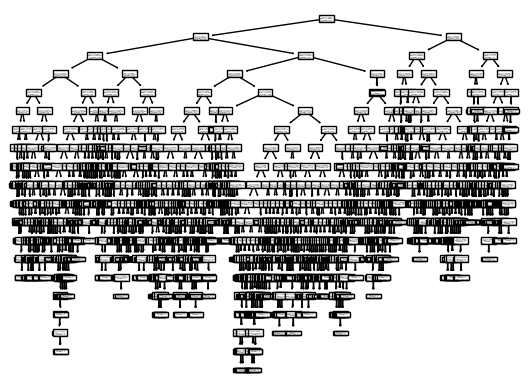

In [99]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(regressor)
plt.show()

In [100]:
y_pred = regressor.predict(x_test)

In [101]:
from sklearn.metrics import r2_score

r_score = r2_score(y_test,y_pred)
r_score

0.6583866108155556